<a href="https://colab.research.google.com/github/Roopg/EMG_Analysis_w_XGBoost/blob/main/EMG_Analysis_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook is based on the EMG data analysis -a study conducted by the UC of Irvine in California.
Electromyography (EMG) measures muscle response or electrical activity in response to a nerve's stimulation of the muscle. The test is used to help detect neuromuscular abnormalities. During the test, one or more small needles (also called electrodes) are inserted through the skin into the muscle.
Possible Use cases for this type of analysis can be- medical diagnosis or build a human-robot interface.

Dataset: https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set

Contributed by:
Theo Theodoridis
School of Computer Science and Electronic Engineering
University of Essex

Bio Electrical Signals collected from a group of 4 subjects  who were asked to perform specific physical actions in 2 categories- Normal(hugging, standing etc) and Aggressive (kicking, hammering)
EMG Signal were collected from the following 8 channels (a channel corresponds to an electrode attached on a muscle)-

Muscle: A pair of muscles that corresponds to a segment.
- R-Bic: right bicep (C1)
- R-Tri: right tricep (C2)
- L-Bic: left bicep (C3)
- L-Tri: left tricep (C4)
- R-Thi: right thigh (C5)
- R-Ham: right hamstring (C6)
- L-Thi: left thigh (C7)
- L-Ham: left hamstring (C8)

Each file in the dataset contains in overall 8 columns.

- Measurment frequency 10 per ms.


In [ ]:
!wget "/content/drive/MyDrive/DS_Datasets/EMG Physical Action Data Set.rar" -O EMG_data.rar 


/content/drive/MyDrive/DS_Datasets/EMG Physical Action Data Set.rar: Scheme missing.


In [ ]:
!unrar x "/content/drive/MyDrive/DS_Datasets/EMG Physical Action Data Set.rar" #extracts the rar file to the current folder


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/DS_Datasets/EMG Physical Action Data Set.rar

Creating    EMG Physical Action Data Set                              OK
Extracting  EMG Physical Action Data Set/readme.txt                        0%  OK 
Creating    EMG Physical Action Data Set/sub1                         OK
Creating    EMG Physical Action Data Set/sub1/Aggressive              OK
Creating    EMG Physical Action Data Set/sub1/Aggressive/log          OK
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Elbowing.log       0%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/FrontKicking.log       0%  1%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Hamering.log       1%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Headering.log       1%  2%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggress

In [ ]:
!sudo apt install tree.  # as a superuser(sudo) install "tree"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (72.4 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure:

### Visualizing the folder structure for each subject.
There are log and corresponing txt files for each activity.

In [ ]:
!tree "./EMG Physical Action Data Set/sub1"

./EMG Physical Action Data Set/sub1
├── Aggressive
│   ├── log
│   │   ├── Elbowing.log
│   │   ├── FrontKicking.log
│   │   ├── Hamering.log
│   │   ├── Headering.log
│   │   ├── Kneeing.log
│   │   ├── Pulling.log
│   │   ├── Punching.log
│   │   ├── Pushing.log
│   │   ├── SideKicking.log
│   │   └── Slapping.log
│   └── txt
│       ├── Elbowing.txt
│       ├── Frontkicking.txt
│       ├── Hamering.txt
│       ├── Headering.txt
│       ├── Kneeing.txt
│       ├── Pulling.txt
│       ├── Punching.txt
│       ├── Pushing.txt
│       ├── Sidekicking.txt
│       └── Slapping.txt
└── Normal
    ├── log
    │   ├── Bowing.log
    │   ├── Clapping.log
    │   ├── Handshaking.log
    │   ├── Hugging.log
    │   ├── Jumping.log
    │   ├── Running.log
    │   ├── Seating.log
    │   ├── Standing.log
    │   ├── Walking.log
    │   └── Waving.log
    └── txt
        ├── Bowing.txt
        ├── Clapping.txt
        ├── Handshaking.txt
        ├── Hugging.txt
        ├── Jumping.txt
        ├── 

In [ ]:
!ls -lrt ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/

total 3768
-rw-r--r-- 1 root root 361096 Feb  7  2010 Slapping.txt
-rw-r--r-- 1 root root 388912 Feb  7  2010 Sidekicking.txt
-rw-r--r-- 1 root root 379428 Feb  7  2010 Pushing.txt
-rw-r--r-- 1 root root 379597 Feb  7  2010 Punching.txt
-rw-r--r-- 1 root root 387656 Feb  7  2010 Pulling.txt
-rw-r--r-- 1 root root 398523 Feb  7  2010 Kneeing.txt
-rw-r--r-- 1 root root 350285 Feb  7  2010 Headering.txt
-rw-r--r-- 1 root root 402363 Feb  7  2010 Hamering.txt
-rw-r--r-- 1 root root 390158 Feb  7  2010 Frontkicking.txt
-rw-r--r-- 1 root root 398095 Feb  7  2010 Elbowing.txt


In [ ]:
### Printing the data

!cat ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt

2	113	129	55	-1042	845	-94	-2474
-226	36	126	15	-1577	498	-373	-1531
-1205	34	-20	67	-2509	83	-572	-674
-1105	70	-92	95	-3444	-240	-709	-407
-517	17	-173	61	-3855	-589	-846	-805
-1951	-218	-146	69	-4000	-790	-1124	-1465
-4000	-608	-100	22	-4000	-875	-1337	-1595
-4000	-735	-83	2	-4000	-224	-1397	-936
-4000	-591	-76	62	-4000	169	-1684	-508
-4000	-552	-29	85	-4000	167	-1909	-446
-1948	-509	-54	131	-4000	135	-1833	-274
1605	-383	-156	142	-4000	57	-1547	128
4000	-306	-188	130	-4000	303	-1458	395
4000	-323	-239	128	-4000	283	-1592	442
4000	-310	-279	116	-4000	-123	-1702	632
4000	40	-311	128	-4000	-393	-1641	1193
4000	250	-253	64	-4000	-271	-1570	1663
1147	-188	-179	10	-3508	-238	-1547	1765
835	-399	-114	-23	-2805	-101	-1655	1643
-484	-11	-66	-95	-2550	201	-1944	1395
-600	485	-15	-139	-2286	227	-2174	1141
188	1041	18	-195	-1971	309	-2549	864
-283	1358	-46	-212	-918	295	-2792	621
538	1516	-127	-271	-287	260	-2893	238
1637	1482	-95	-324	264	249	-2756	426
2156	1051	85	-303	551	215	-2483	1199
219

### Data from 8 channels/ sensors and each set of 10 readings makes up 1ms

In [ ]:
## word count- lines
!wc -l ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt



9788 ./EMG Physical Action Data Set/sub1/Aggressive/txt/Slapping.txt


#### Total lines 9788, so we are capturing a signal for 978 msec (as 10 lines correspond to 1msec) for one activity of one subject.

GOAL- Data from 8 bio-electrical sensors plugged to a human, if human thinks he will jump, 8 sensors will capture the data and we will 

Neurobiology- the signals that spike when we think of performing an activity (eg Jump), the same signals spike when we actually perform those activities, i.e jump.We can use this to build a ML model that can PREDICT the activity being perfromed based on the signals and can be used to control robotic motions in the future.

We start off by building the dataset- defining features and labels for our machine learning model.

Note: for one activity the signals are captured from the start of the activity to the end of the activity. So we will have multiple rows (approx 10K) of signals corresponding to just one activity. Each row is the signal captured in 1/10msec.

In bio signal processing , spikes matter, so we can take a max of a chunk of 10 readings in 1 msec. So we apply max operation on every sequential 10 observed values (10 rows) this is also called chunking. So 10 rows are replaced by 1 maximum value, this reduces the dataset size. This forms our X.

Class Label (Y) are extracted from the file names(Bowing.txt) by removing the last 4 character.

In [ ]:
#### Creating the machine learning dataset for the data recorded from one person.

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 

actions = {} #defining an empty dictionary for action names and corresponding labels

data_dirs = ["./EMG Physical Action Data Set/sub1/Aggressive/txt",
             "./EMG Physical Action Data Set/sub1/Normal/txt"]

ind = 0
data = pd.DataFrame()

for dirs in data_dirs :

  for files in os.listdir(dirs):

    with open(os.path.join(dirs, files), "r") as f:  # from all the files within all the dirs, read the tab separated files.

     # Extracting the 8 columns names from filenames
      temp = pd.read_csv(f.name,
                        sep = "\t",
                        header = None, 
                        names = ["ch" + str(i) for i in range(1, 9)] # 8 input channels
                        )
      
      # chunking using Max of every 10 sequential values.
      temp_chunked = pd.DataFrame()

      for i in range(0, len(temp), 10):
        temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)

      # Defining the class labels 

      labels = [files[:-4] for i in range(len(temp_chunked))] # remove the last 4 characters=".txt" from the filename to get the activity name
      actions[files[:-4]] = ind # We have about 20 activity classes and they are assigned a numeric labels in the actions dictionary.
      temp_chunked["Action"] = labels

      # Final Data pro
      data = pd.concat([data, temp_chunked])

      ind+=1

print(actions)

{'Kneeing': 0, 'Headering': 1, 'Sidekicking': 2, 'Pushing': 3, 'Frontkicking': 4, 'Elbowing': 5, 'Punching': 6, 'Hamering': 7, 'Pulling': 8, 'Slapping': 9, 'Running': 10, 'Hugging': 11, 'Waving': 12, 'Standing': 13, 'Handshaking': 14, 'Jumping': 15, 'Seating': 16, 'Clapping': 17, 'Bowing': 18, 'Walking': 19}


The pandas dataframe for our dataset is now ready.

### Exploratory data analysis

In [ ]:
data.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,292.0,647.0,349.0,261.0,4000.0,4000.0,4000.0,-4000.0,Kneeing
1,260.0,1256.0,504.0,170.0,-4000.0,4000.0,4000.0,4000.0,Kneeing
2,104.0,409.0,764.0,207.0,4000.0,4000.0,4000.0,4000.0,Kneeing
3,385.0,786.0,793.0,146.0,4000.0,1033.0,4000.0,4000.0,Kneeing
4,8.0,1055.0,215.0,142.0,2569.0,-4000.0,4000.0,-4000.0,Kneeing


Each cell for ch1-ch8 corresponds to the maximum value of the signal recorded in 1msec

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19711 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     19711 non-null  float64
 1   ch2     19711 non-null  float64
 2   ch3     19711 non-null  float64
 3   ch4     19711 non-null  float64
 4   ch5     19711 non-null  float64
 5   ch6     19711 non-null  float64
 6   ch7     19711 non-null  float64
 7   ch8     19711 non-null  float64
 8   Action  19711 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.5+ MB


We have a total of 19711 observations for one subject. Fro simplicity we are considering data from one subject, for more rigorous analysis , data from all 4 subjects should be included.

In [ ]:
data["Action"].value_counts()

Kneeing         1000
Hamering        1000
Clapping        1000
Seating         1000
Jumping         1000
Waving          1000
Headering       1000
Walking         1000
Running          997
Sidekicking      983
Bowing           983
Frontkicking     982
Slapping         979
Elbowing         978
Hugging          976
Standing         973
Pushing          968
Pulling          966
Punching         964
Handshaking      962
Name: Action, dtype: int64

### Fairly well balanced data

In [ ]:
X=data.drop(["Action"], axis=1)
X

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,292.0,647.0,349.0,261.0,4000.0,4000.0,4000.0,-4000.0
1,260.0,1256.0,504.0,170.0,-4000.0,4000.0,4000.0,4000.0
2,104.0,409.0,764.0,207.0,4000.0,4000.0,4000.0,4000.0
3,385.0,786.0,793.0,146.0,4000.0,1033.0,4000.0,4000.0
4,8.0,1055.0,215.0,142.0,2569.0,-4000.0,4000.0,-4000.0
...,...,...,...,...,...,...,...,...
995,12.0,24.0,-13.0,207.0,-3573.0,-9.0,-4000.0,766.0
996,8.0,19.0,71.0,110.0,-2729.0,119.0,-4000.0,740.0
997,31.0,37.0,47.0,113.0,4000.0,62.0,-2369.0,-3.0
998,6.0,55.0,22.0,29.0,4000.0,144.0,232.0,-494.0


In [ ]:
Y=data["Action"]
Y

0      Kneeing
1      Kneeing
2      Kneeing
3      Kneeing
4      Kneeing
        ...   
995    Walking
996    Walking
997    Walking
998    Walking
999    Walking
Name: Action, Length: 19711, dtype: object

In [ ]:
## Label encoding the target variable

# Label encoding
Y = Y.map(actions) # actions is the dictionary we created earlier.
Y.head()
print(Y.value_counts())

0     1000
7     1000
17    1000
16    1000
15    1000
12    1000
1     1000
19    1000
10     997
2      983
18     983
4      982
9      979
5      978
11     976
13     973
3      968
8      966
6      964
14     962
Name: Action, dtype: int64


In [ ]:
### Domain Specified Pre-Processing- we will take the rectified EMG signals as we dont care about the negative spikes.

X=abs(X)
X.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,292.0,647.0,349.0,261.0,4000.0,4000.0,4000.0,4000.0
1,260.0,1256.0,504.0,170.0,4000.0,4000.0,4000.0,4000.0
2,104.0,409.0,764.0,207.0,4000.0,4000.0,4000.0,4000.0
3,385.0,786.0,793.0,146.0,4000.0,1033.0,4000.0,4000.0
4,8.0,1055.0,215.0,142.0,2569.0,4000.0,4000.0,4000.0


Fortunately in bio-medical world , and in our dataset as well, the data is numeric, so we don't need to perform any categorical encoding.

In [ ]:
# Train, test split

from sklearn.model_selection import train_test_split

X = np.array(X.values.tolist())
Y = np.array(Y.values.tolist())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True) # 80-20 split
print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Sizes of the sets created are:
Training set:15768
Test set:3943


## Training the model using cross validation

In [ ]:
# We train a simple decision tree using 5-fold cross validation and Grid Search for best hyper-param selection
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='accuracy')

## Displaying the grid-search results

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.32274219819837213 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.32274219819837213 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.32274219819837213 Rank: 7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.4004309692070903 Rank: 5
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.4325839790631302 Rank: 3
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.44330280207413864 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.4004309692070903 Rank: 5
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.4296033148569037 Rank: 4
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.43911639346207504 Rank: 2


In [ ]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25)


In [ ]:
# Learning Curves in sklearn

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

  fig, axes = plt.subplots(1, 1, figsize = (10, 5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")


  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
  )
  axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
  axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
  axes.legend(loc="best")

  plt.show()

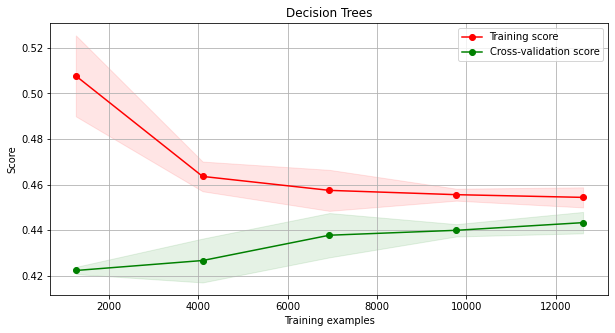

0.44685438863521054


In [ ]:
model1 = clf.best_estimator_

model1.fit(X_train, Y_train)

plot_learning_curve(model1, X_train, Y_train, "Decision Trees")

print(model1.score(X_train, Y_train))

# more data could help as CV-score is improving as datset size increases.

### Accuracy of a simple decision tree classifier is 44%.

### When the data size is small the model overfits and we see big difference between the training score and cv score. As training samples increases, the training and cross validations score curves tend to converge.

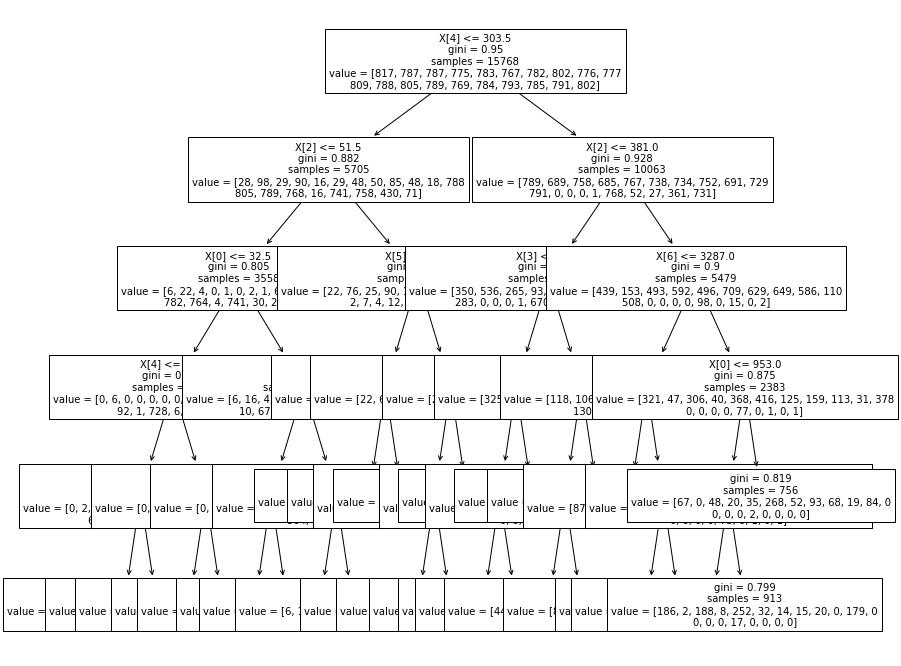

In [ ]:
# plot the decision tree
from sklearn import tree

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model1, fontsize=10)
plt.show()

In [ ]:
# Xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains 
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.6, 0.8, 1.0],     # concept of bagging in xgboost- row sampling
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=False) #100 base learners, for multiclass- log loss does not work. need softmax




In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )

# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores

start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.6, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


### Training the classifier using the best parameters on the complete training data

In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.6, max_depth=3, learning_rate=0.1, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=1.0, num_class=20, objective='multi:softprob',
              silent=True, subsample=0.6)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Time taken for training : 0:05:36.779446
Training accuracy:0.6752283105022832
Test Accuracy: 0.6145067207709866


### We observe that by using the XGBoost library our model accuracy imporved from 44% to 61.4%

### Visualizing the Feature Importances

If we have 100 base learners, we calculate the feature importance of feature 
f(i) in each of the base learners and take average of the value.

[0.13511088 0.07006846 0.15971653 0.08302426 0.19007535 0.13316596
 0.12077375 0.10806489]


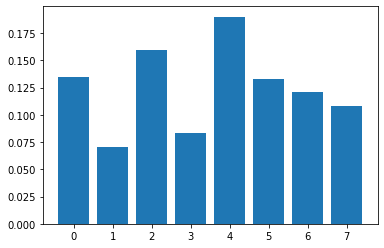

In [ ]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

### We find that the electrode connected to the right thigh was the most useful in our model's training. Since most people are right handed, it might make more logical sense.

### Domain specific ideas to improve the results: Average data across time- Smoothing operation can be done after the Max- we can calculate the moving average over the sliding window.
### Source: https://www.researchgate.net/figure/EMG-signal-process-recommended-Green-The-raw-signal-no-treatment-was-applied-until_fig2_258344784